Support Vector Machines are perhaps one of the most popular and talked about machine learning
algorithms. They were extremely popular around the time they were developed in the 1990s
and continue to be the go-to method for a high-performing algorithm with little tuning.

The Maximal-Margin Classifier is a hypothetical classifier that best explains how SVM works in
practice. The numeric input variables (x) in your data (the columns) form an n-dimensional
space. For example, if you had two input variables, this would form a two-dimensional space. A
hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to
best separate the points in the input variable space by their class, either class 0 or class 1. In
two-dimensions you can visualize this as a line and let’s assume that all of our input points can
be completely separated by this line. For example:

B0 + (B1 × X1) + (B2 × X2) = 0

Where the coefficients (B1 and B2) that determine the slope of the line and the intercept
(B0) are found by the learning algorithm, and X1 and X2 are the two input variables.You can
make classifications using this line. By plugging in input values into the line equation, you can
calculate whether a new point is above or below the line.

* Above the line, the equation returns a value greater than 0 and the point belongs to the first class (class 0).
* Below the line, the equation returns a value less than 0 and the point belongs to the second class (class 1).
* A value close to the line returns a value close to zero and the point may be difficult to classify.
* If the magnitude of the value is large, the model may have more confidence in the prediction.

The distance between the line and the closest data points is referred to as the margin. The
best or optimal line that can separate the two classes is the line that as the largest margin.
This is called the Maximal-Margin hyperplane. The margin is calculated as the perpendicular
distance from the line to only the closest points. Only these points are relevant in defining
the line and in the construction of the classifier. These points are called the support vectors.
They support or define the hyperplane. The hyperplane is learned from training data using an
optimization procedure that maximizes the margin.


In practice, real data is messy and cannot be separated perfectly with a hyperplane. The
constraint of maximizing the margin of the line that separates the classes must be relaxed. This
is often called the soft margin classifier. This change allows some points in the training data to
violate the separating line. An additional set of coefficients are introduced that give the margin
wiggle room in each dimension. These coefficients are sometimes called slack variables. This
increases the complexity of the model as there are more parameters for the model to fit to the
data to provide this complexity.
A tuning parameter is introduced called simply C that defines the magnitude of the wiggle
allowed across all dimensions. The C parameters defines the amount of violation of the margin
allowed. A C = 0 is no violation and we are back to the inflexible Maximal-Margin Classifier
described above. The larger the value of C the more violations of the hyperplane are permitted.
During the learning of the hyperplane from data, all training instances that lie within the
distance of the margin will affect the placement of the hyperplane and are referred to as support
vectors. And as C affects the number of instances that are allowed to fall within the margin, C
influences the number of support vectors used by the model.
* The smaller the value of C, the more sensitive the algorithm is to the training data (higher variance and lower bias).
* The larger the value of C, the less sensitive the algorithm is to the training data (lower variance and higher bias).

The SVM algorithm is implemented in practice using a kernel. The learning of the hyperplane in
linear SVM is done by transforming the problem using some linear algebra. A powerful insight is that the linear SVM can be rephrased
using the inner product of any two given observations, rather than the observations themselves.

The inner product between two vectors is the sum of the multiplication of each pair of input
values. For example, the inner product of the vectors [2, 3] and [5, 6] is 2 × 5 + 3 × 6 or 28. The
equation for making a prediction for a new input using the dot product between the input (x)
and each support vector (x i ) is calculated as follows:

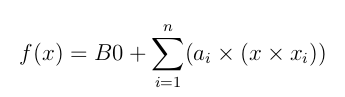

This is an equation that involves calculating the inner products of a new input vector (x)
with all support vectors in training data. The coefficients B0 and a i (for each input) must be
estimated from the training data by the learning algorithm.

The SVM model needs to be solved using an optimization procedure. You can use a numerical
optimization procedure to search for the coefficients of the hyperplane. This is inefficient and
is not the approach used in widely used SVM implementations like LIBSVM. If implementing
the algorithm as an exercise, you could use a variation of gradient descent called sub-gradient
descent.
There are specialized optimization procedures that re-formulate the optimization problem
to be a Quadratic Programming problem. The most popular method for fitting SVM is the
Sequential Minimal Optimization (SMO) method that is very efficient. It breaks the problem
down into sub-problems that can be solved analytically (by calculating) rather than numerically
(by searching or optimizing).




Kernel: The function used to map a lower dimensional data into a higher dimensional data.

Hyper Plane: In SVM this is basically the separation line between the data classes. Although in SVR we are going to define it as the line that will will help us predict the continuous value or target value

Boundary line: In SVM there are two lines other than Hyper Plane which creates a margin . The support vectors can be on the Boundary lines or outside it. This boundary line separates the two classes. In SVR the concept is same.

Support vectors: This are the data points which are closest to the boundary. The distance of the points is minimum or least.
    
In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold.

Our best fit line is the line hyperplane that has maximum number of points.

What we are trying to do here is basically trying to decide a decision boundary at ‘e’ distance from the original hyper plane such that data points closest to the hyper plane or the support vectors are within that boundary line

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [15]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
#rbf = Gaussian Radial Basis Function Kernel
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# Predicting a new result
print(X_test)
y_pred = regressor.predict(X_test)

[[3]
 [9]]


In [9]:
y_pred

array([129997.29257314, 130002.2779053 ])

In [14]:
y_test

array([ 60000, 500000])